In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Final dataset.zip'  # Change this if needed

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
!ls /content/

 drive	'Final dataset'   sample_data


In [ ]:
import os
import random
import shutil
from pathlib import Path

# Paths
source_images = Path('/content/Final dataset/images')
source_labels = Path('/content/Final dataset/labels')
output_dir = Path('/content/dataset')  # destination root
train_ratio = 0.8  # 80% train, 20% val

# Make destination folders
for split in ['train', 'val']:
    (output_dir / split / 'images').mkdir(parents=True, exist_ok=True)
    (output_dir / split / 'labels').mkdir(parents=True, exist_ok=True)

# Get all image files
image_files = list(source_images.glob('*.jpg'))  # adjust if you're using .png
random.shuffle(image_files)

# Split
train_count = int(train_ratio * len(image_files))
train_files = image_files[:train_count]
val_files = image_files[train_count:]

# Copy files
def copy_files(files, split):
    for img_path in files:
        label_path = source_labels / (img_path.stem + '.txt')
        if label_path.exists():
            shutil.copy(img_path, output_dir / split / 'images' / img_path.name)
            shutil.copy(label_path, output_dir / split / 'labels' / label_path.name)

copy_files(train_files, 'train')
copy_files(val_files, 'val')

print(f"✅ Done: {len(train_files)} train images, {len(val_files)} val images")

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')  # You can use yolov8n, yolov8s, yolov8m, etc.
model.train(data='/content/dataset/data.yaml', epochs=100, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/Sample_detection_Image.jpeg: 448x640 1 minor_pothole, 58.2ms
Speed: 9.7ms preprocess, 58.2ms inference, 371.1ms postprocess per image at shape (1, 3, 448, 640)


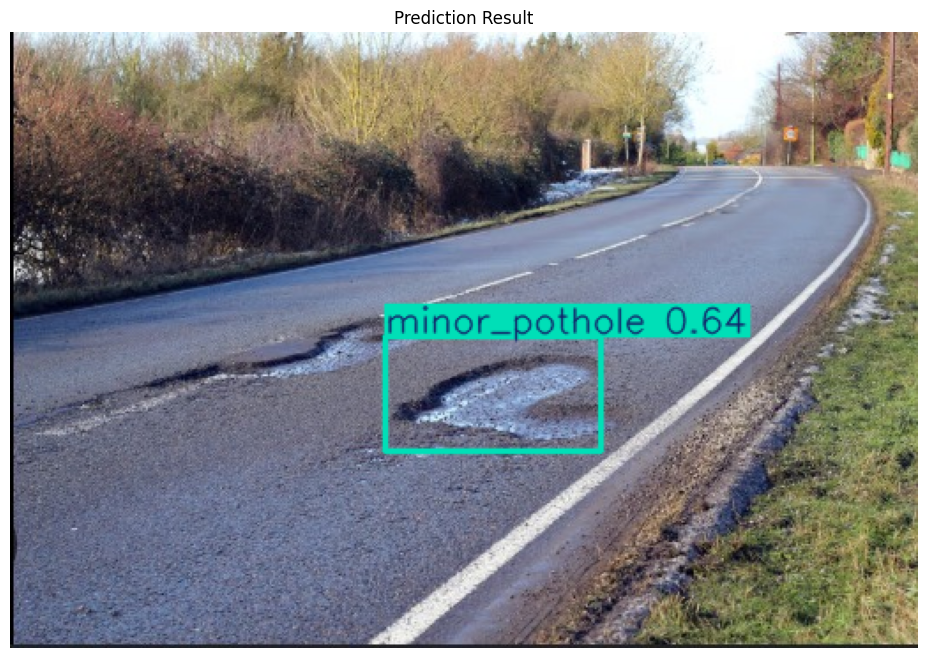

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO("/content/best.pt")  # Make sure best.pt is in the same directory or give full path

# Load and run inference on the image
image_path = "/content/Sample_detection_Image.jpeg"  # Replace with your image file
results = model.predict(source=image_path, save=False, conf=0.25)

# Plot the image with bounding boxes
for r in results:
    result_img = r.plot()  # Draw boxes on the image

# Convert BGR to RGB for correct color display in matplotlib
result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(result_img_rgb)
plt.axis('off')
plt.title("Prediction Result")
plt.show()


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/best.pt")

# Run evaluation
metrics = model.val(data="/content/data.yaml", imgsz=640, batch=2, device='0')

# ✅ Step 4: Print mean evaluation metrics
mp, mr, map50, map = metrics.mean_results()

print("✅ Evaluation Complete")
print(f"Precision (mean): {mp * 100:.2f}%")
print(f"Recall (mean):    {mr * 100:.2f}%")
print(f"mAP@0.5:          {map50 * 100:.2f}%")
print(f"mAP@0.5:0.95:     {map * 100:.2f}%")


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1164.6±515.0 MB/s, size: 58.0 KB)


val: Scanning /content/dataset/val/labels.cache... 217 images, 48 backgrounds, 0 corrupt: 100%|██████████| 217/217 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 109/109 [00:09<00:00, 11.06it/s]


                   all        217        451      0.894        0.9      0.954      0.824
          Low_Cracking         15         26      0.882      0.861      0.966      0.818
       Medium_Cracking         16         24      0.868      0.708      0.881       0.76
         High_Cracking         15         17      0.735      0.882      0.942      0.811
         minor_pothole         82        252       0.94      0.802      0.923      0.672
      moderate_pothole         78         99      0.982       0.99      0.986      0.846
         major_pothole         23         23      0.943      0.957      0.965      0.919
    Modrate_Edge_Break          4          4      0.963          1      0.995      0.913
      Major_Edge_Break          6          6      0.842          1      0.972      0.852
Speed: 0.4ms preprocess, 23.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2
✅ Evaluation Complete
Precision (mean): 89.43%
Recall (mean):    90.01%
mAP@0.5:  